In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings('ignore')

***Data Understanding***

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
df.shape

(100000, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


***Data Exploration***

In [8]:
df.duplicated().sum()

3854

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['smoking_history'].value_counts() # 35816 no info so we should drop columns to avoid inaccureate data 

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [12]:
df.drop(columns=['smoking_history'],inplace=True) #preprocessing

In [13]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


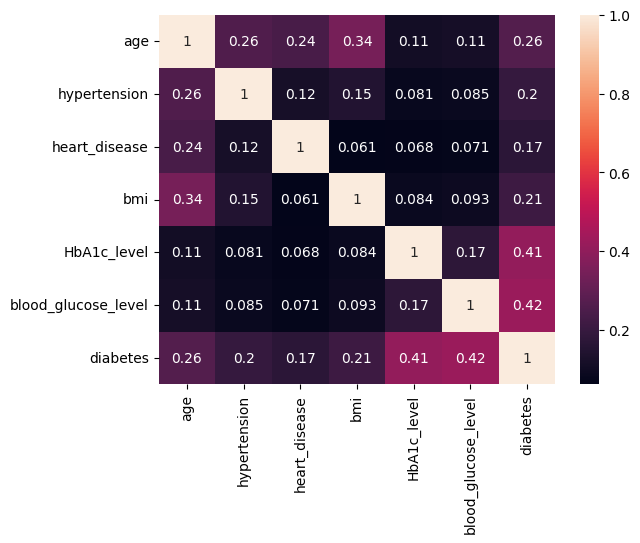

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

***EDA & INSIGHTS***

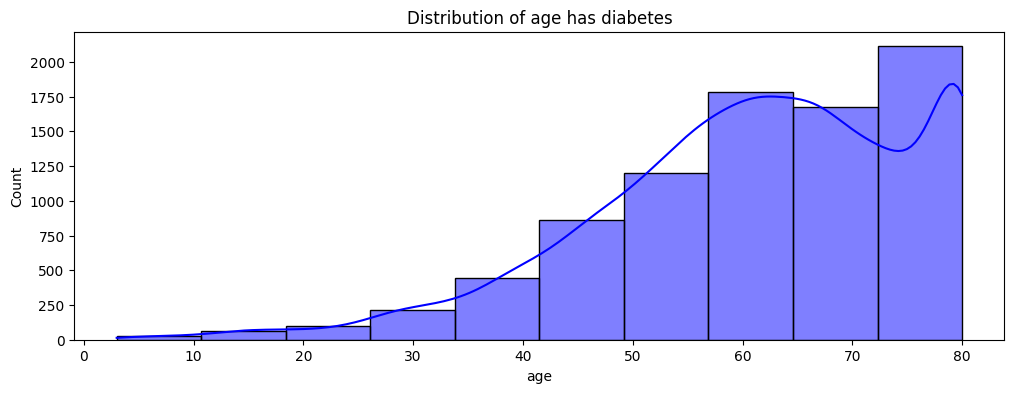

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(df['age'][df['diabetes']==1],bins=10,color='blue',kde=True)
plt.title('Distribution of age has diabetes')
plt.show()

In [16]:
values=df['hypertension'][df['diabetes']==1].value_counts().values
index=df['hypertension'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is Hypertension affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

In [17]:
values=df['heart_disease'][df['diabetes']==1].value_counts().values
index=df['heart_disease'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is Heart disease affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

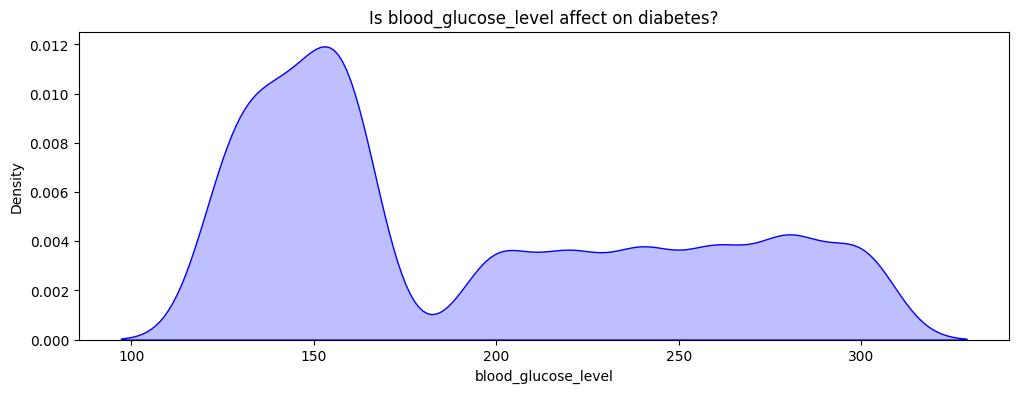

In [18]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['blood_glucose_level'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is blood_glucose_level affect on diabetes?')
plt.show()

In [19]:
values=df['gender'][df['diabetes']==1].value_counts().values
index=df['gender'][df['diabetes']==1].value_counts().index
fig=px.pie(values=values,names=index,title='Is gender affect on Diabetes?',template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

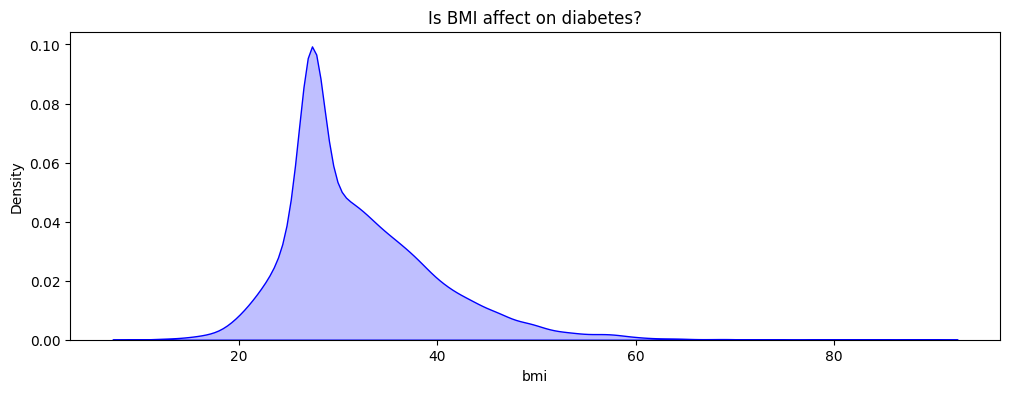

In [20]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['bmi'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is BMI affect on diabetes?')
plt.show()

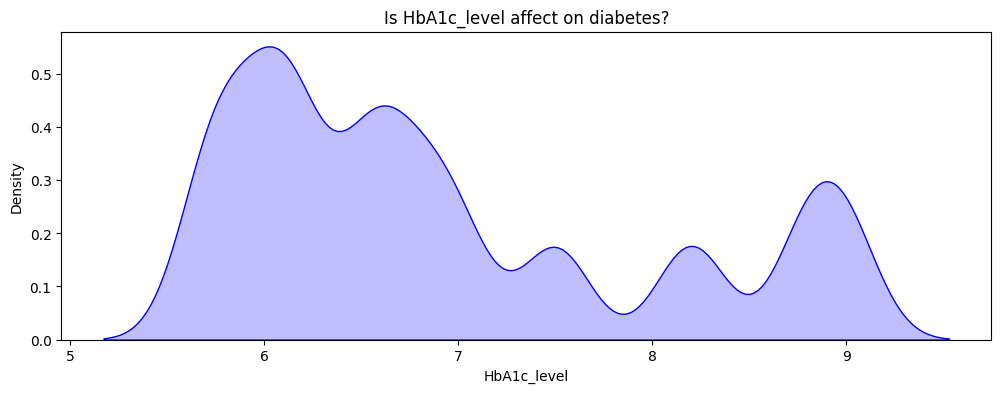

In [21]:
plt.figure(figsize=(12,4))
fig= sns.kdeplot(df['HbA1c_level'][df['diabetes']==1],fill=True,color='blue')
plt.title('Is HbA1c_level affect on diabetes?')
plt.show()

In [22]:
df["diabetes"].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

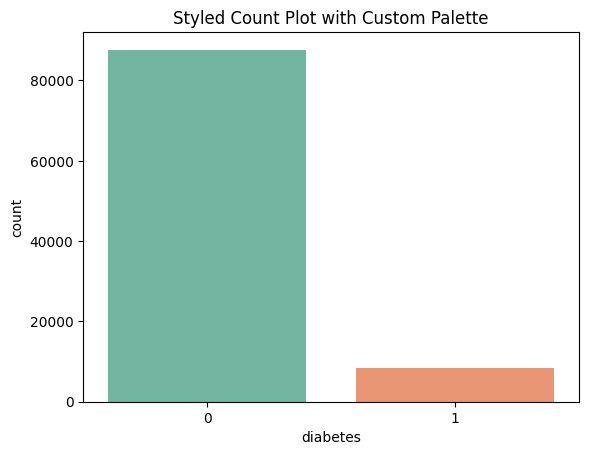

In [23]:
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title('Styled Count Plot with Custom Palette')
plt.show()

In [24]:
df["diabetes"].value_counts()*100/len(df)

diabetes
0    91.178
1     8.822
Name: count, dtype: float64

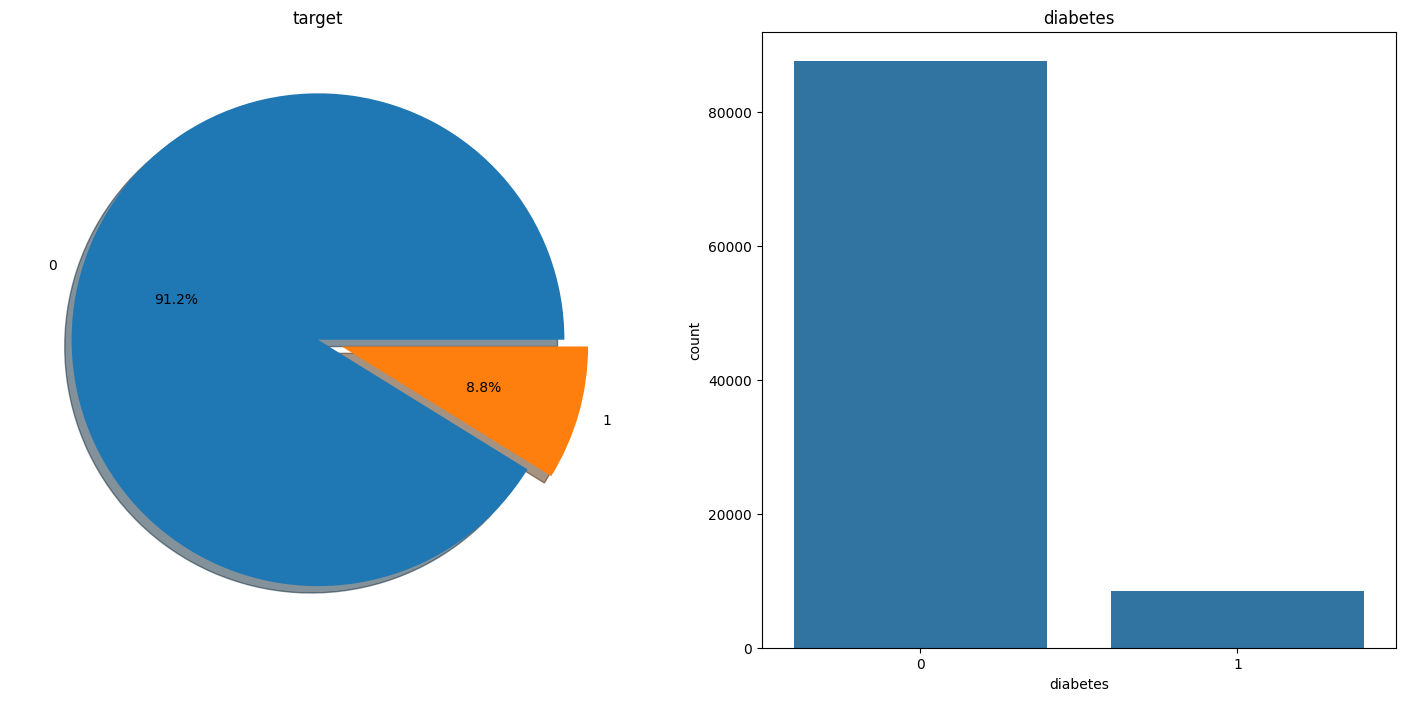

In [25]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='diabetes',data=df,ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

***Encoding Categorical Columns***

In [26]:
le=LabelEncoder()

In [27]:
df['gender']=le.fit_transform(df['gender'])

In [28]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0


***Balance Data***

Total class distribution (1 and 0):
diabetes
1    87664
0    87664
Name: count, dtype: int64


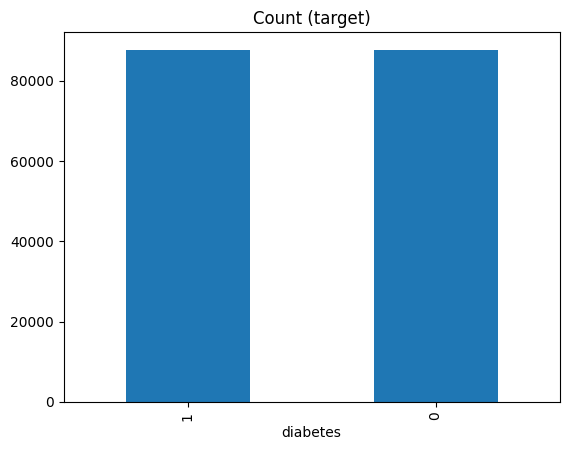

In [29]:
# Assuming your data is in a DataFrame called df
# Separate the classes
class_0 = df[df['diabetes'] == 0]
class_1 = df[df['diabetes'] == 1]

# Get the count of class 0
class_count_0 = class_0.shape[0]

# Over-sample class 1 to match the count of class 0 (with replacement)
class_1_over = class_1.sample(class_count_0, replace=True)

# Concatenate the over-sampled class 1 with class 0
df = pd.concat([class_1_over, class_0], axis=0)

# Check the distribution of the classes after over-sampling
print("Total class distribution (1 and 0):")
print(df['diabetes'].value_counts())

# Plot the distribution
df['diabetes'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

***Handling Outliers***

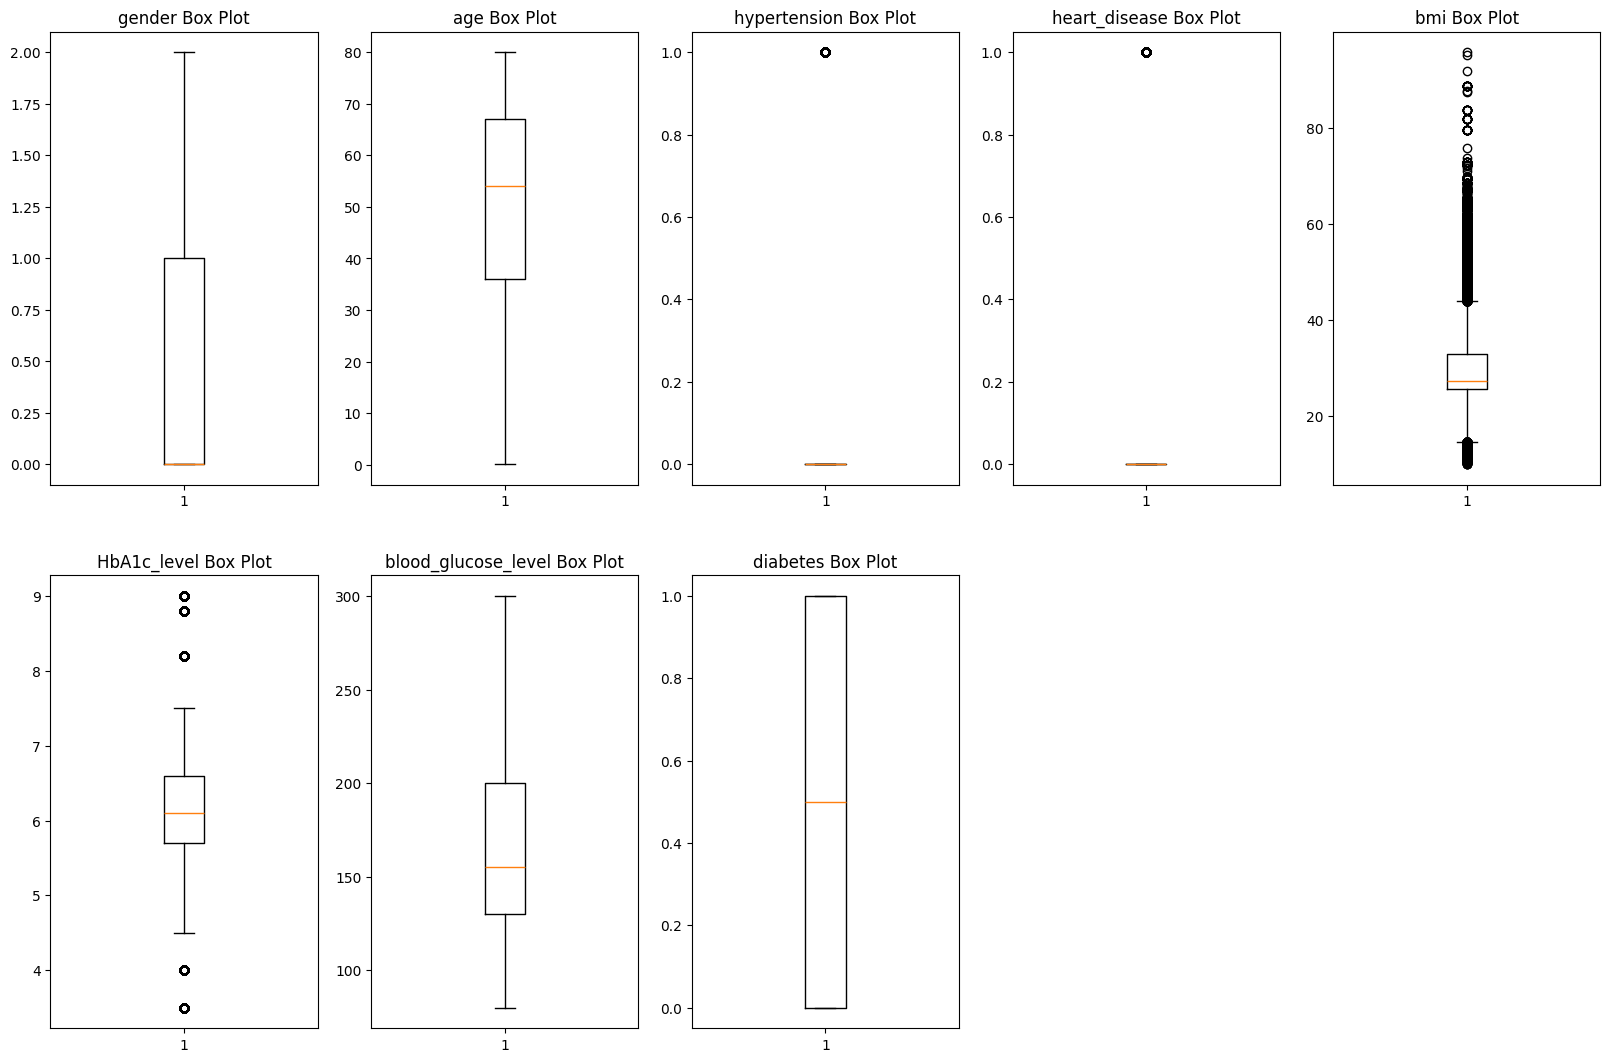

In [31]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(3,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show() 

In [32]:

for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = df[df[col] < lower_fennse][col].values
    Up_Outlier = df[df[col] > Upper_Fennse][col].values
    df[col].replace(Low_Outlier , lower_fennse , inplace=True)
    df[col].replace(Up_Outlier , Upper_Fennse , inplace=True)


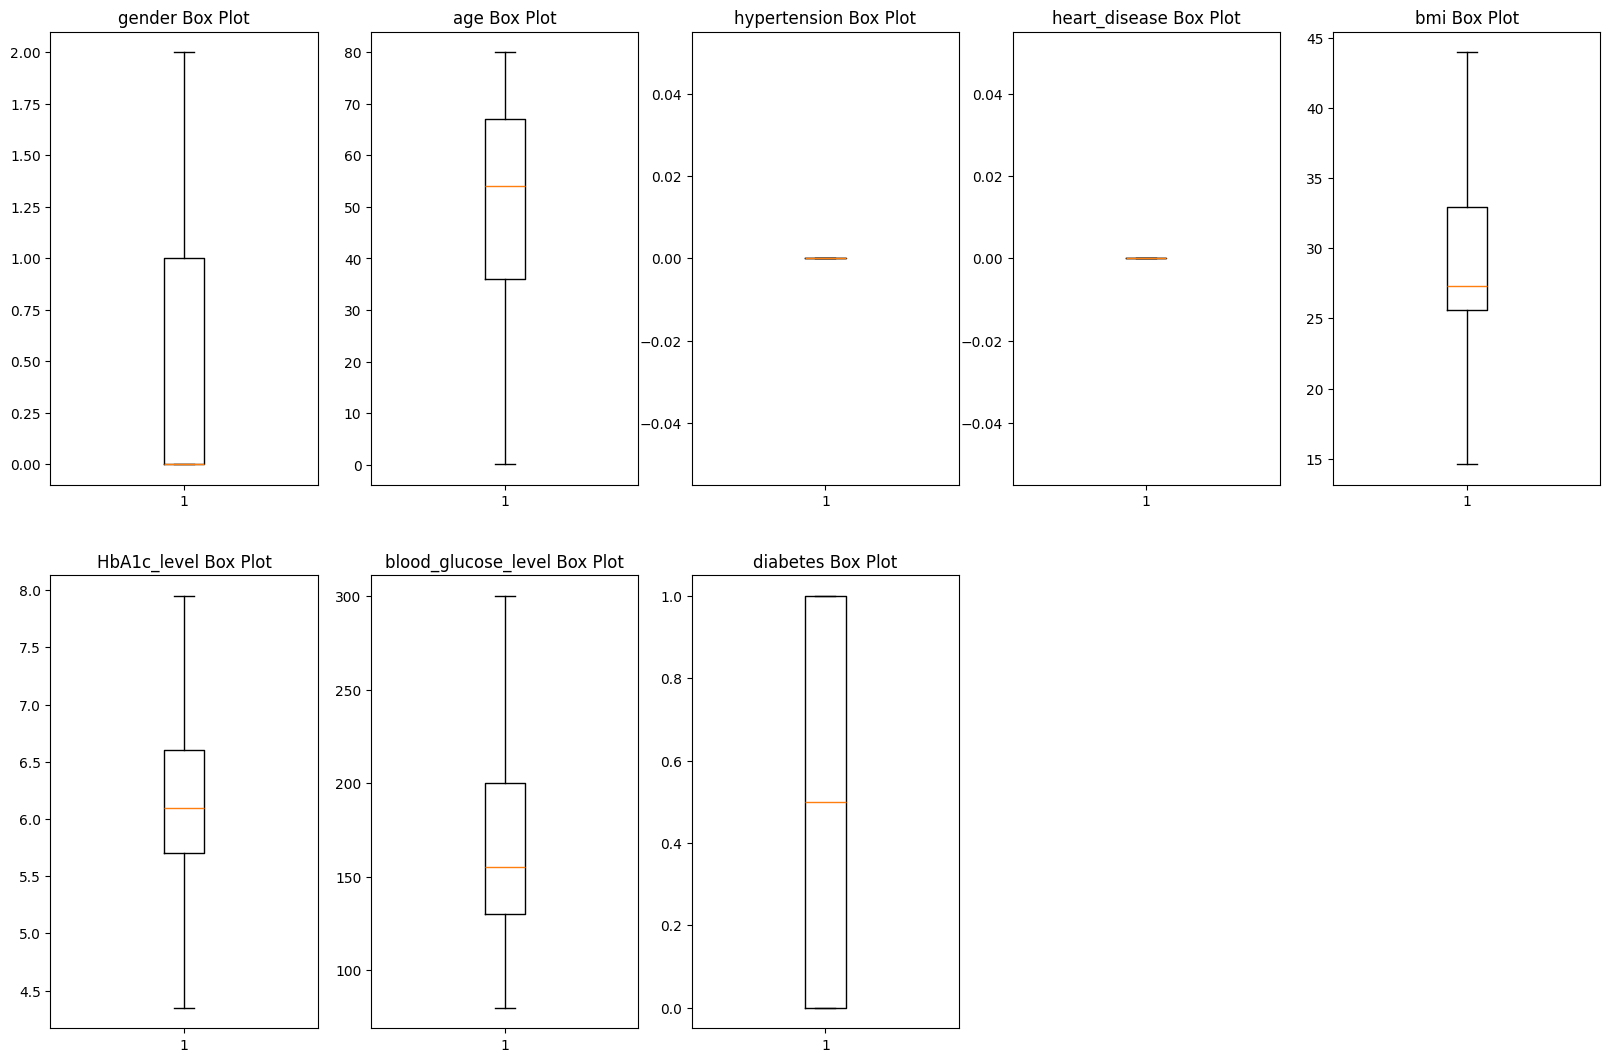

In [33]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i , col in enumerate(Numeric_columns):
    plt.subplot(3,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show()

In [34]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
56111,1,46.0,0,0,34.83,7.00,200,1
97750,0,42.0,0,0,24.81,6.80,160,1
53026,1,55.0,0,0,24.93,6.80,200,1
64948,1,67.0,0,0,27.20,6.80,240,1
33943,1,80.0,0,0,31.72,6.60,155,1
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,24.60,4.80,145,0
99996,0,2.0,0,0,17.37,6.50,100,0
99997,1,66.0,0,0,27.83,5.70,155,0
99998,0,24.0,0,0,35.42,4.35,100,0


In [35]:
df["diabetes"].value_counts()*100/len(df)

diabetes
1    50.0
0    50.0
Name: count, dtype: float64

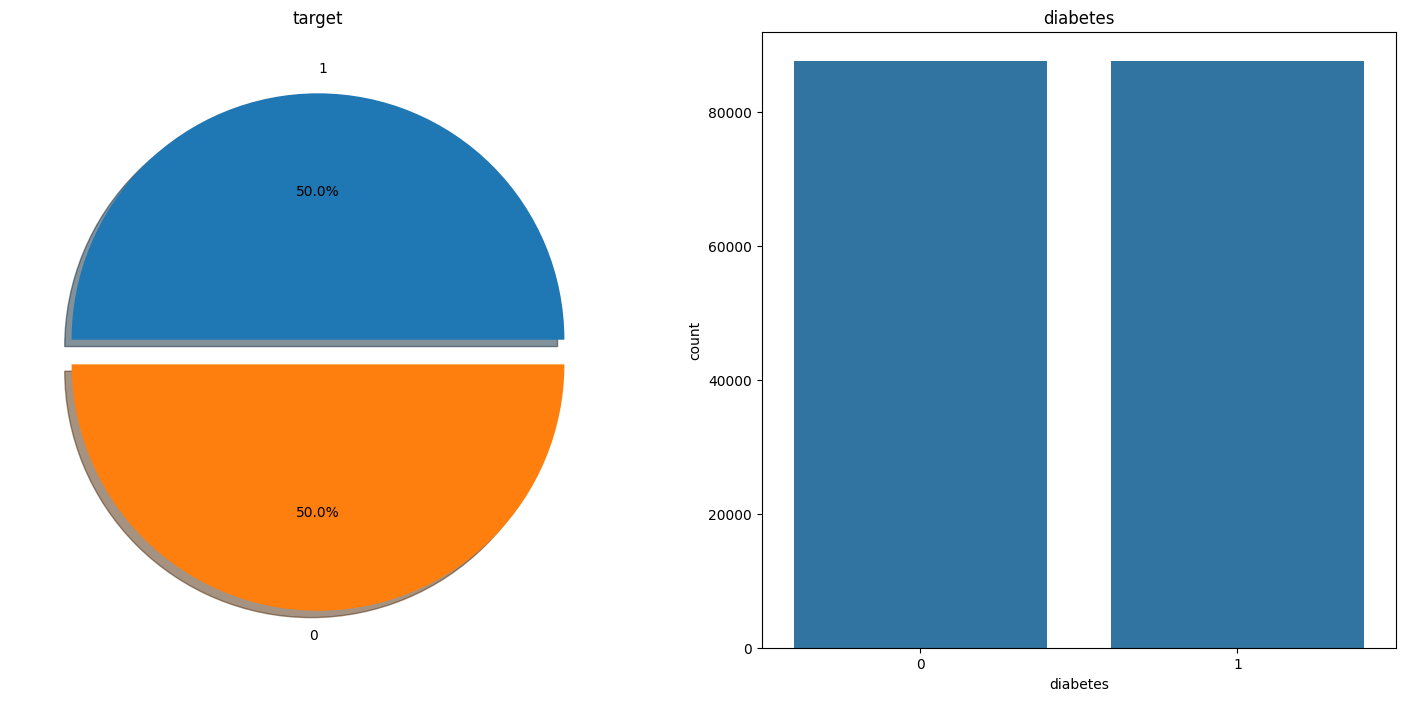

In [36]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='diabetes',data=df,ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

In [ ]:
df.shape

***Spliting Data***

In [37]:
x=df.drop(columns=['diabetes'])
y=df['diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Normalizatio of Data***

In [38]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
56111,0.5,0.574575,0.0,0.0,0.688692,0.736111,0.545455,1.0
97750,0.0,0.524525,0.0,0.0,0.347411,0.680556,0.363636,1.0
53026,0.5,0.687187,0.0,0.0,0.351499,0.680556,0.545455,1.0
64948,0.5,0.837337,0.0,0.0,0.428815,0.680556,0.727273,1.0
33943,0.5,1.000000,0.0,0.0,0.582766,0.625000,0.340909,1.0


***Modeling***


In [39]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred_lr=lr.predict(x_test)

Accuracy Train Score : 0.8784845503415037

Accuracy Test Score : 0.8760337649004734

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     17534
           1       0.88      0.88      0.88     17532

    accuracy                           0.88     35066
   macro avg       0.88      0.88      0.88     35066
weighted avg       0.88      0.88      0.88     35066




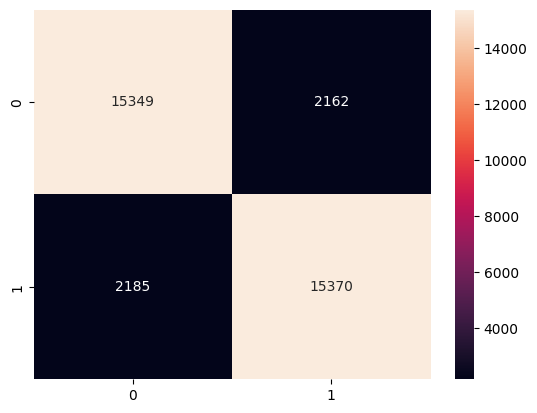

In [43]:
evaluate_model(lr,y_pred_lr)

In [44]:
dt=DecisionTreeClassifier()

In [45]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred_dt=dt.predict(x_test)

Accuracy Train Score : 0.9969129201066576

Accuracy Test Score : 0.9824901614099127

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     17534
           1       0.97      1.00      0.98     17532

    accuracy                           0.98     35066
   macro avg       0.98      0.98      0.98     35066
weighted avg       0.98      0.98      0.98     35066




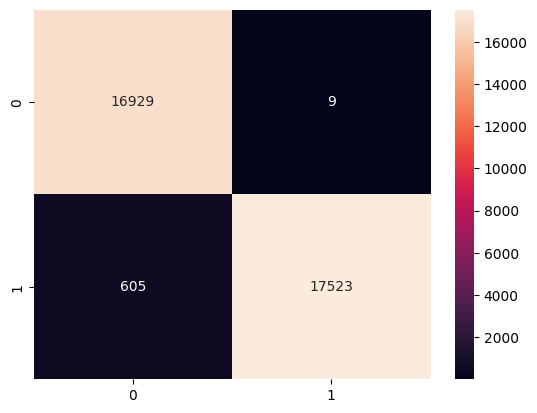

In [47]:
evaluate_model(dt,y_pred_dt)

In [48]:
rf=RandomForestClassifier()

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred_rf=rf.predict(x_test)

Accuracy Train Score : 0.9969129201066576

Accuracy Test Score : 0.9871385387554896

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     17534
           1       0.98      1.00      0.99     17532

    accuracy                           0.99     35066
   macro avg       0.99      0.99      0.99     35066
weighted avg       0.99      0.99      0.99     35066




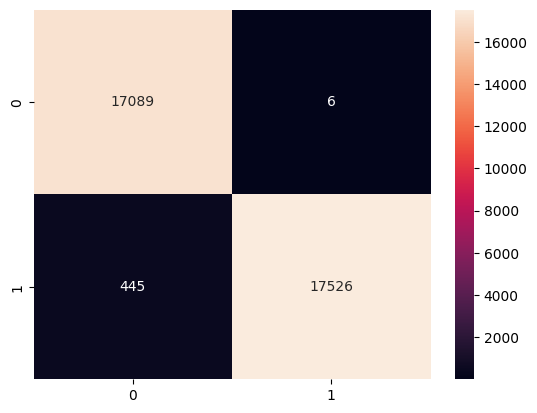

In [51]:
evaluate_model(rf,y_pred_rf)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175328 entries, 56111 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               175328 non-null  float64
 1   age                  175328 non-null  float64
 2   hypertension         175328 non-null  float64
 3   heart_disease        175328 non-null  float64
 4   bmi                  175328 non-null  float64
 5   HbA1c_level          175328 non-null  float64
 6   blood_glucose_level  175328 non-null  float64
 7   diabetes             175328 non-null  float64
dtypes: float64(8)
memory usage: 12.0 MB


In [52]:
# Save the model again with the current scikit-learn version
import joblib
joblib.dump(rf, "RF.pkl")
print("Model saved successfully!")

Model saved successfully!
